text blob: library for simplified text processing
built using NLTK
also lexicon-based: https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml
but uses: part of speech (POS), polarity, subjectivity, intensity, and confidence.

Few examples:

In [137]:
from textblob import TextBlob # pip import textblob
TextBlob('what an amazing and wonderfull day!').sentiment.polarity

0.7500000000000001

In [138]:
TextBlob('what an amazing and wonderfull day').sentiment.polarity

0.6000000000000001

In [139]:
text = 'Analysis: European dealmakers face shrinking debt options as recession risk looms' # https://www.reuters.com/markets/europe/european-dealmakers-face-shrinking-debt-options-recession-risk-looms-2022-05-16/
TextBlob(text).sentiment.polarity

0.0

In [140]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
df = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [141]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [142]:
data_3 = df.copy()
len(data_3)

14640

In [143]:
from tqdm import tqdm
tqdm.pandas()
data_3['scores_Textblob'] = data_3['text'].progress_apply(lambda x: TextBlob(x).polarity)

100%|██████████████████████████████████████████████████████████████████████████| 14640/14640 [00:02<00:00, 5827.09it/s]


In [144]:
data_3

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_Textblob
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,0.000000
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,0.000000
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,-0.390625
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,0.006250
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,-0.350000
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,0.000000
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,-0.300000
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,0.000000
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",-0.125000


In [145]:
data_3["text"][1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [146]:
data_3['scores_Textblob'] = data_3['scores_Textblob'].progress_apply(lambda x: "negative" if x < 0 else ("positive" if x >0.1 else "neutral"))

100%|███████████████████████████████████████████████████████████████████████| 14640/14640 [00:00<00:00, 1104578.27it/s]


In [147]:
data_3

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_Textblob
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,neutral
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,neutral
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,negative
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,neutral
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,negative
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,neutral
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,neutral
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",negative


In [148]:
data_3['scores_Textblob'].value_counts()

neutral     6341
positive    4630
negative    3669
Name: scores_Textblob, dtype: int64

In [149]:
from sklearn.metrics import classification_report
print(classification_report(data_3['airline_sentiment'],data_3['scores_Textblob']))

              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.30      0.61      0.40      3099
    positive       0.37      0.73      0.49      2363

    accuracy                           0.47     14640
   macro avg       0.52      0.56      0.47     14640
weighted avg       0.68      0.47      0.48     14640



In [150]:
from sklearn import metrics
y_true = data_3['airline_sentiment']

# Get the predicted labels
y_pred = data_3['scores_Textblob']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
# auc=metrics.roc_auc_score(y_true, y_pred, multi_class='ovr')
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
# print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.46789617486338797
Precision: 0.6758372404468911
Recall: 0.46789617486338797
F1 score: 0.4800555546783644
Confusion Matrix [[3234 3902 2042]
 [ 331 1898  870]
 [ 104  541 1718]]


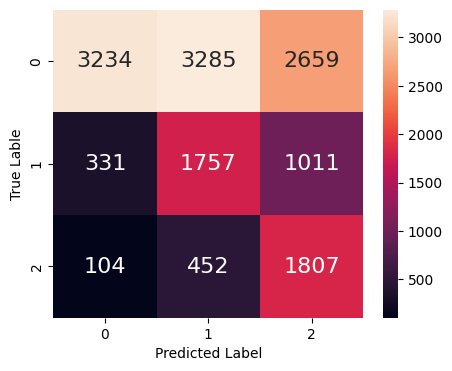

In [76]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [77]:
import pandas as pd
# Load the Sentiment140 dataset as a data frame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin1', names=['polarity', 'id', 'date', 'query', 'user', 'text'])
# Print the first 5 rows of the data frame
print(f"\n The shape data is:{df.shape}")


 The shape data is:(1600000, 6)


In [78]:
data = df.copy()
len(data)

1600000

In [79]:
#all negative
data_1 = data[1:10001]
#all positive
data_2 = data[1590000:1600000]

In [80]:
# Concatenate the two data frames
data_3 = pd.concat([data_1, data_2], ignore_index=True)

# Shuffle the rows of the data frame
data_3 = data_3.sample(frac=1).reset_index(drop=True)

In [81]:
from tqdm import tqdm
tqdm.pandas()
data_3['scores_Textblob'] = data_3['text'].progress_apply(lambda x: TextBlob(x).polarity)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 6385.48it/s]


In [82]:
data_3['scores_Textblob'] = data_3['scores_Textblob'].progress_apply(lambda x: "negative" if x < 0 else ("neutral" if x == 0.000000 else "positive"))

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1183444.27it/s]


In [83]:
data_3['polarity'] = data_3['polarity'].progress_apply(lambda x: "negative" if x == 0 else "positive")

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 1168671.62it/s]


In [54]:
data_copy = data_3[data_3['scores_Textblob'] != 'neutral']

In [55]:
data_copy

,polarity,id,date,query,user,text,scores_Textblob
0,positive,2192653674,Tue Jun 16 07:21:20 PDT 2009,NO_QUERY,jodyeagle4,@JesseMcCartney i am too! its going to be cool...,positive
4,positive,2193343006,Tue Jun 16 08:19:43 PDT 2009,NO_QUERY,RandieHensley,@behancrunk stoked your finally on Twiter! And...,positive
5,positive,2192399573,Tue Jun 16 06:58:56 PDT 2009,NO_QUERY,mariuscioane,@seaofbeauty good morning!,positive
6,negative,1550729779,Sat Apr 18 07:05:12 PDT 2009,NO_QUERY,thedoyleswife,Aww that's sad,negative
8,positive,2193344363,Tue Jun 16 08:19:50 PDT 2009,NO_QUERY,jyssica_bOOG,So not a mornin person but God is Good cuz I'm...,positive
...,...,...,...,...,...,...,...
19993,positive,2191327237,Tue Jun 16 05:02:22 PDT 2009,NO_QUERY,dljordaneku,@Van_Dee you are crazy you know that right?,negative
19994,positive,2193031934,Tue Jun 16 07:54:09 PDT 2009,NO_QUERY,don_mysteriorvd,I love 80's songs now lml,positive
19996,positive,2192292313,Tue Jun 16 06:48:51 PDT 2009,NO_QUERY,livelaughenjoy,Goodmorning twttr verse hope y'all had a gr8 ...,positive
19997,positive,2192249387,Tue Jun 16 06:44:54 PDT 2009,NO_QUERY,ghbetbeze,@NuGoth cheers mate was actually checking my ...,positive


In [58]:
print(classification_report(data_copy['polarity'],data_copy['scores_Textblob']))

              precision    recall  f1-score   support

    negative       0.77      0.52      0.62      6410
    positive       0.65      0.85      0.73      6567

    accuracy                           0.69     12977
   macro avg       0.71      0.69      0.68     12977
weighted avg       0.71      0.69      0.68     12977



In [60]:
from sklearn import metrics
y_true = data_copy["polarity"] 

# Get the predicted labels
y_pred = data_copy['scores_Textblob']
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred,pos_label="positive")
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,pos_label="positive")
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,pos_label="positive")
# auc=metrics.roc_auc_score(y_true, y_pred)
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
# print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.688294675194575
Precision: 0.6456456456456456
Recall: 0.8512258261001979
F1 score: 0.7343185550082102
Confusion Matrix [[3342 3068]
 [ 977 5590]]


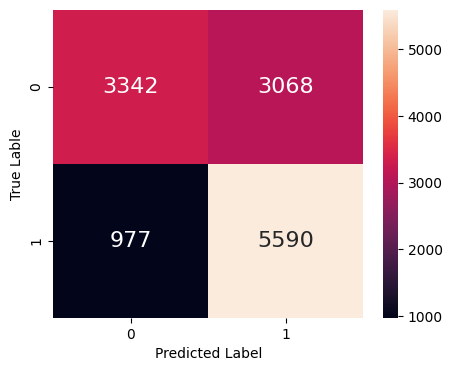

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [11]:
from tqdm import tqdm
tqdm.pandas()

In [11]:
df["polarity"].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

In [18]:
def textblob_sentiment(row):
    import numpy as np, pandas as pd
    from textblob import TextBlob
    textblob_sentiment = { 'ground_truth':row['polarity']}
    polarity = TextBlob(row['text']).polarity
    if polarity<0:
        textblob_sentiment['textblob_verdict'] = 'negative'
    else:
        textblob_sentiment['textblob_verdict'] = 'positive'     
    textblob_sentiment['polarity_sentiment'] = polarity
    return pd.Series(textblob_sentiment)

In [21]:
from tqdm import tqdm
textblob_sentiment = df.progress_apply(textblob_sentiment, axis=1)

100%|██████████████████████████████████████████████████████████████████████| 1600000/1600000 [11:31<00:00, 2314.55it/s]


In [22]:
textblob_sentiment 

,ground_truth,textblob_verdict,polarity_sentiment
0,0,positive,0.216667
1,0,positive,0.000000
2,0,positive,0.500000
3,0,positive,0.200000
4,0,negative,-0.625000
...,...,...,...
1599995,4,positive,1.000000
1599996,4,positive,0.290000
1599997,4,positive,0.200000
1599998,4,positive,1.000000


In [24]:
textblob_sentiment ['ground_truth'] = textblob_sentiment ['ground_truth'].apply(lambda x: "positive" if x == textblob_sentiment['ground_truth'][1599999] else "negative")

In [25]:
from sklearn.metrics import classification_report
print(classification_report(textblob_sentiment['ground_truth'],textblob_sentiment['textblob_verdict']))

              precision    recall  f1-score   support

    negative       0.76      0.32      0.45    800000
    positive       0.57      0.90      0.70    800000

    accuracy                           0.61   1600000
   macro avg       0.67      0.61      0.57   1600000
weighted avg       0.67      0.61      0.57   1600000



It looks like it's better in postive prediction. But let's try another data set, where we have positive, negative and neutral labeling.  

In [26]:
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
another_data_set = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
another_data_set.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [27]:
def textblob_sentiment(row):
    import numpy as np, pandas as pd
    from textblob import TextBlob
    textblob_sentiment = { 'ground_truth':row['airline_sentiment']}
    polarity = TextBlob(row['text']).polarity
    if polarity<0:
        textblob_sentiment['textblob_verdict'] = 'negative'
    else:
        textblob_sentiment['textblob_verdict'] = 'positive'     
    textblob_sentiment['polarity_sentiment'] = polarity
    return pd.Series(textblob_sentiment)

In [28]:
textblob_sentiment = another_data_set.progress_apply(textblob_sentiment, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 14640/14640 [00:05<00:00, 2485.74it/s]


In [29]:
print(classification_report(textblob_sentiment['ground_truth'],textblob_sentiment['textblob_verdict']))

              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.00      0.00      0.00      3099
    positive       0.21      0.96      0.34      2363

    accuracy                           0.38     14640
   macro avg       0.36      0.44      0.28     14640
weighted avg       0.59      0.38      0.37     14640



C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leon\anaconda3\envs\NLP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's make some preprocessing of the text and see if it's improve our results:

In [32]:
%matplotlib inline
import gensim
import logging
import numpy as np, matplotlib.pyplot as plt, os
import pandas as pd
import json, zipfile
# configure logger. Can be logging.Info or logging.Error to control printouts during training
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s', level = logging.ERROR) 
root_notebook_folder = os.path.abspath('.')
data_folder = os.path.abspath('./local_data/twitter_airline_sentiment')
data_folder

'C:\\Users\\Leon\\Machine Learning\\Data science for finance\\local_data\\twitter_airline_sentiment'

In [34]:
def load_stopwords(data_folder):
    stopwords_file_name = os.path.join(data_folder, 'stopwords.txt')
    stopwords_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"

    if not os.path.isfile(stopwords_file_name):
        import requests
        stopwords = requests.get(stopwords_url).text.split()
        with open(stopwords_file_name,'w+t', encoding='utf-8') as out_file:
            out_file.write(' '.join(stopwords))
    else: 
        with open(stopwords_file_name,'rt', encoding='utf-8') as in_file:
            stopwords = in_file.readline().split()
    stopwords = set(stopwords)
    return stopwords
stopwords = load_stopwords(data_folder)
print(stopwords)

{'no', 'so', 'just', 'by', 'there', 'yourselves', 'all', 'than', 'have', 'its', 'those', 'been', 'under', 'doing', 'now', 'he', 'are', 'through', 'myself', 'can', 'our', 'who', 'having', 'does', 'above', 'a', 'don', 'itself', 'do', 'further', 'in', 'because', 'other', 'we', 'nor', 'him', 'very', 'your', 'with', 'only', 'ours', 'while', 'over', 'few', 'me', 'on', 'will', 'they', 'against', 'whom', 'theirs', 'off', 'why', 'himself', 'this', 'you', 'the', 'below', 'most', 'at', 'again', 'how', 'what', 'her', 'did', 'an', 'then', 'same', 'am', 'after', 'ourselves', 'my', 'both', 'once', 'down', 'it', 'own', 'but', 'too', 'has', 'between', 'out', 'into', 'is', 'until', 'them', 's', 'and', 't', 'themselves', 'from', 'as', 'had', 'when', 'i', 'each', 'were', 'his', 'to', 'herself', 'if', 'be', 'that', 'hers', 'yours', 'where', 'about', 'their', 'for', 'which', 'more', 'before', 'yourself', 'was', 'during', 'should', 'some', 'up', 'any', 'not', 'she', 'of', 'here', 'such', 'being', 'these', 'o

In [35]:
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
data = pd.read_csv(os.path.join(data_folder, 'Tweets.csv'), index_col=None, usecols=use_cols)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [36]:
from pandas.api.types import is_numeric_dtype, is_string_dtype

for col_name in data.columns:
    if is_numeric_dtype(data[col_name]):
        data[col_name] = data[col_name].fillna(0)
    elif is_string_dtype(data[col_name]):
        data[col_name] = data[col_name].fillna('')
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,,0.0000,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,,0.0000,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,,0.0000,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,jnardino,,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,jnardino,,0,@VirginAmerica and it's a really big bad thing...


In [37]:
!pip install contractions

In [38]:
def clean_text(x):
    from gensim.utils import simple_preprocess
    import contractions
    x = contractions.fix(x)
    x = ' '.join(simple_preprocess(x))
    return x
data['clean_text'] = data['text'].apply(clean_text)

In [39]:
data['clean_text']

0                         virginamerica what dhepburn said
1        virginamerica plus you have added commercials ...
2        virginamerica did not today must mean need to ...
3        virginamerica it is really aggressive to blast...
4        virginamerica and it is really big bad thing a...
                               ...                        
14635    americanair thank you we got on different flig...
14636    americanair leaving over minutes late flight n...
14637    americanair please bring american airlines to ...
14638    americanair you have my money you change my fl...
14639    americanair we have people so we need know how...
Name: clean_text, Length: 14640, dtype: object

In [40]:
def clean_text(x):
    import contractions
    return contractions.fix(x)
TXT = data['text'].apply(clean_text)

In [41]:
def textblob_sentiment(row):
    import numpy as np, pandas as pd
    from textblob import TextBlob
    textblob_sentiment = { 'ground_truth':row['airline_sentiment']}
    polarity = TextBlob(row['text']).polarity
    if polarity<-0.01:
        textblob_sentiment['textblob_verdict'] = 'negative'
    elif polarity>0.01:
        textblob_sentiment['textblob_verdict'] = 'positive'
    else:
        textblob_sentiment['textblob_verdict'] = 'neutral'     
    textblob_sentiment['polarity'] = polarity
    return pd.Series(textblob_sentiment)

In [42]:
textblob_sentiment = data.apply(textblob_sentiment, axis=1)

In [43]:
textblob_sentiment

,ground_truth,textblob_verdict,polarity
0,neutral,neutral,0.000000
1,positive,neutral,0.000000
2,neutral,negative,-0.390625
3,negative,neutral,0.006250
4,negative,negative,-0.350000
...,...,...,...
14635,positive,neutral,0.000000
14636,negative,negative,-0.300000
14637,neutral,neutral,0.000000
14638,negative,negative,-0.125000


In [44]:
print(classification_report(textblob_sentiment['ground_truth'],textblob_sentiment['textblob_verdict']))

              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.32      0.57      0.41      3099
    positive       0.33      0.76      0.46      2363

    accuracy                           0.46     14640
   macro avg       0.51      0.56      0.46     14640
weighted avg       0.67      0.46      0.48     14640



It's look like this model les suitable for our data. IN my opinion it's because of its threshold difficulty we need to deside when it's positive, neutral or negative.